# Linear Regression

In [ ]:
1. What is the main difference between simple and multiple linear regression?

Simple Linear Regression uses one independent variable to predict a dependent variable, while Multiple Linear Regression uses two or more independent variables.

In [ ]:
2. How do you evaluate the performance of a linear regression model?

 R-squared, Adjusted R-squared, Mean Squared Error (MSE), Root Mean Squared Error (RMSE).

In [ ]:
3. What is the purpose of regularization in linear regression? How does L1 regularization differ from L2 regularization?

Regularization prevents overfitting by penalizing large coefficients.
L1 Regularization (Lasso): Shrinks coefficients to zero, allowing feature selection.
L2 Regularization (Ridge): Shrinks coefficients but does not make them zero

# Logistic Regression

In [ ]:
1. How does logistic regression differ from linear regression in terms of its application?

Linear Regression predicts continuous values, while Logistic Regression predicts probabilities for classification problems.

In [ ]:
2. What is the sigmoid function, and why is it used in logistic regression?

The sigmoid function maps input values to a range between 0 and 1, making it ideal for probability estimation.

In [ ]:
3. What is the multicollinearity problem, and how do you solve it?

Multicollinearity occurs when independent variables are highly correlated.
To remove multicollinearity we need to remove correlated variables, use Ridge Regression, or apply Principal Component Analysis (PCA).

# Decision Trees

In [ ]:
1. How does a decision tree algorithm work, and how does it make predictions?

It splits data based on feature values into branches, creating a tree structure. Predictions are made by traversing the tree to a leaf node.

In [ ]:
2. What are the criteria used to split a node in a decision tree?

Gini Impurity (measures impurity), Information Gain (reduction in entropy), Mean Squared Error (for regression trees).


In [ ]:
3. What is overfitting in decision trees, and how can it be prevented?

Overfitting occurs when the tree is too complex and fits noise in the data.
Solutions: Limit tree depth, use pruning, set minimum samples per leaf.

In [ ]:
4. How do you decide the maximum depth of a decision tree?

Use cross-validation to balance bias and variance or set a threshold based on domain knowledge.

# Ensemble Techniques

In [ ]:
1. What is an ensemble learning technique, and why is it used in machine learning?

Combines multiple models (e.g., decision trees) to improve accuracy and reduce overfitting.


In [ ]:
2. What is bootstrap=True in an ensemble technique?

Enables sampling with replacement to create diverse training subsets for models like Bagging.

In [ ]:
3. What is pasting?

Similar to Bagging, but sampling is without replacement.


In [ ]:
4. What is the OOB method?

Out-of-Bag method evaluates model performance using samples not included in the bootstrap sample.

Create a Linear Regression model and apply regularization using the dataset from this link. Ensure that both Lasso and Ridge regularization are used, and perform feature selection using VIF. Follow the same process as before, including handling null values, removing duplicate rows, and performing necessary data visualization and plotting.

Link - https://raw.githubusercontent.com/s4sauravv/Datasets/refs/heads/main/Admission_Prediction.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


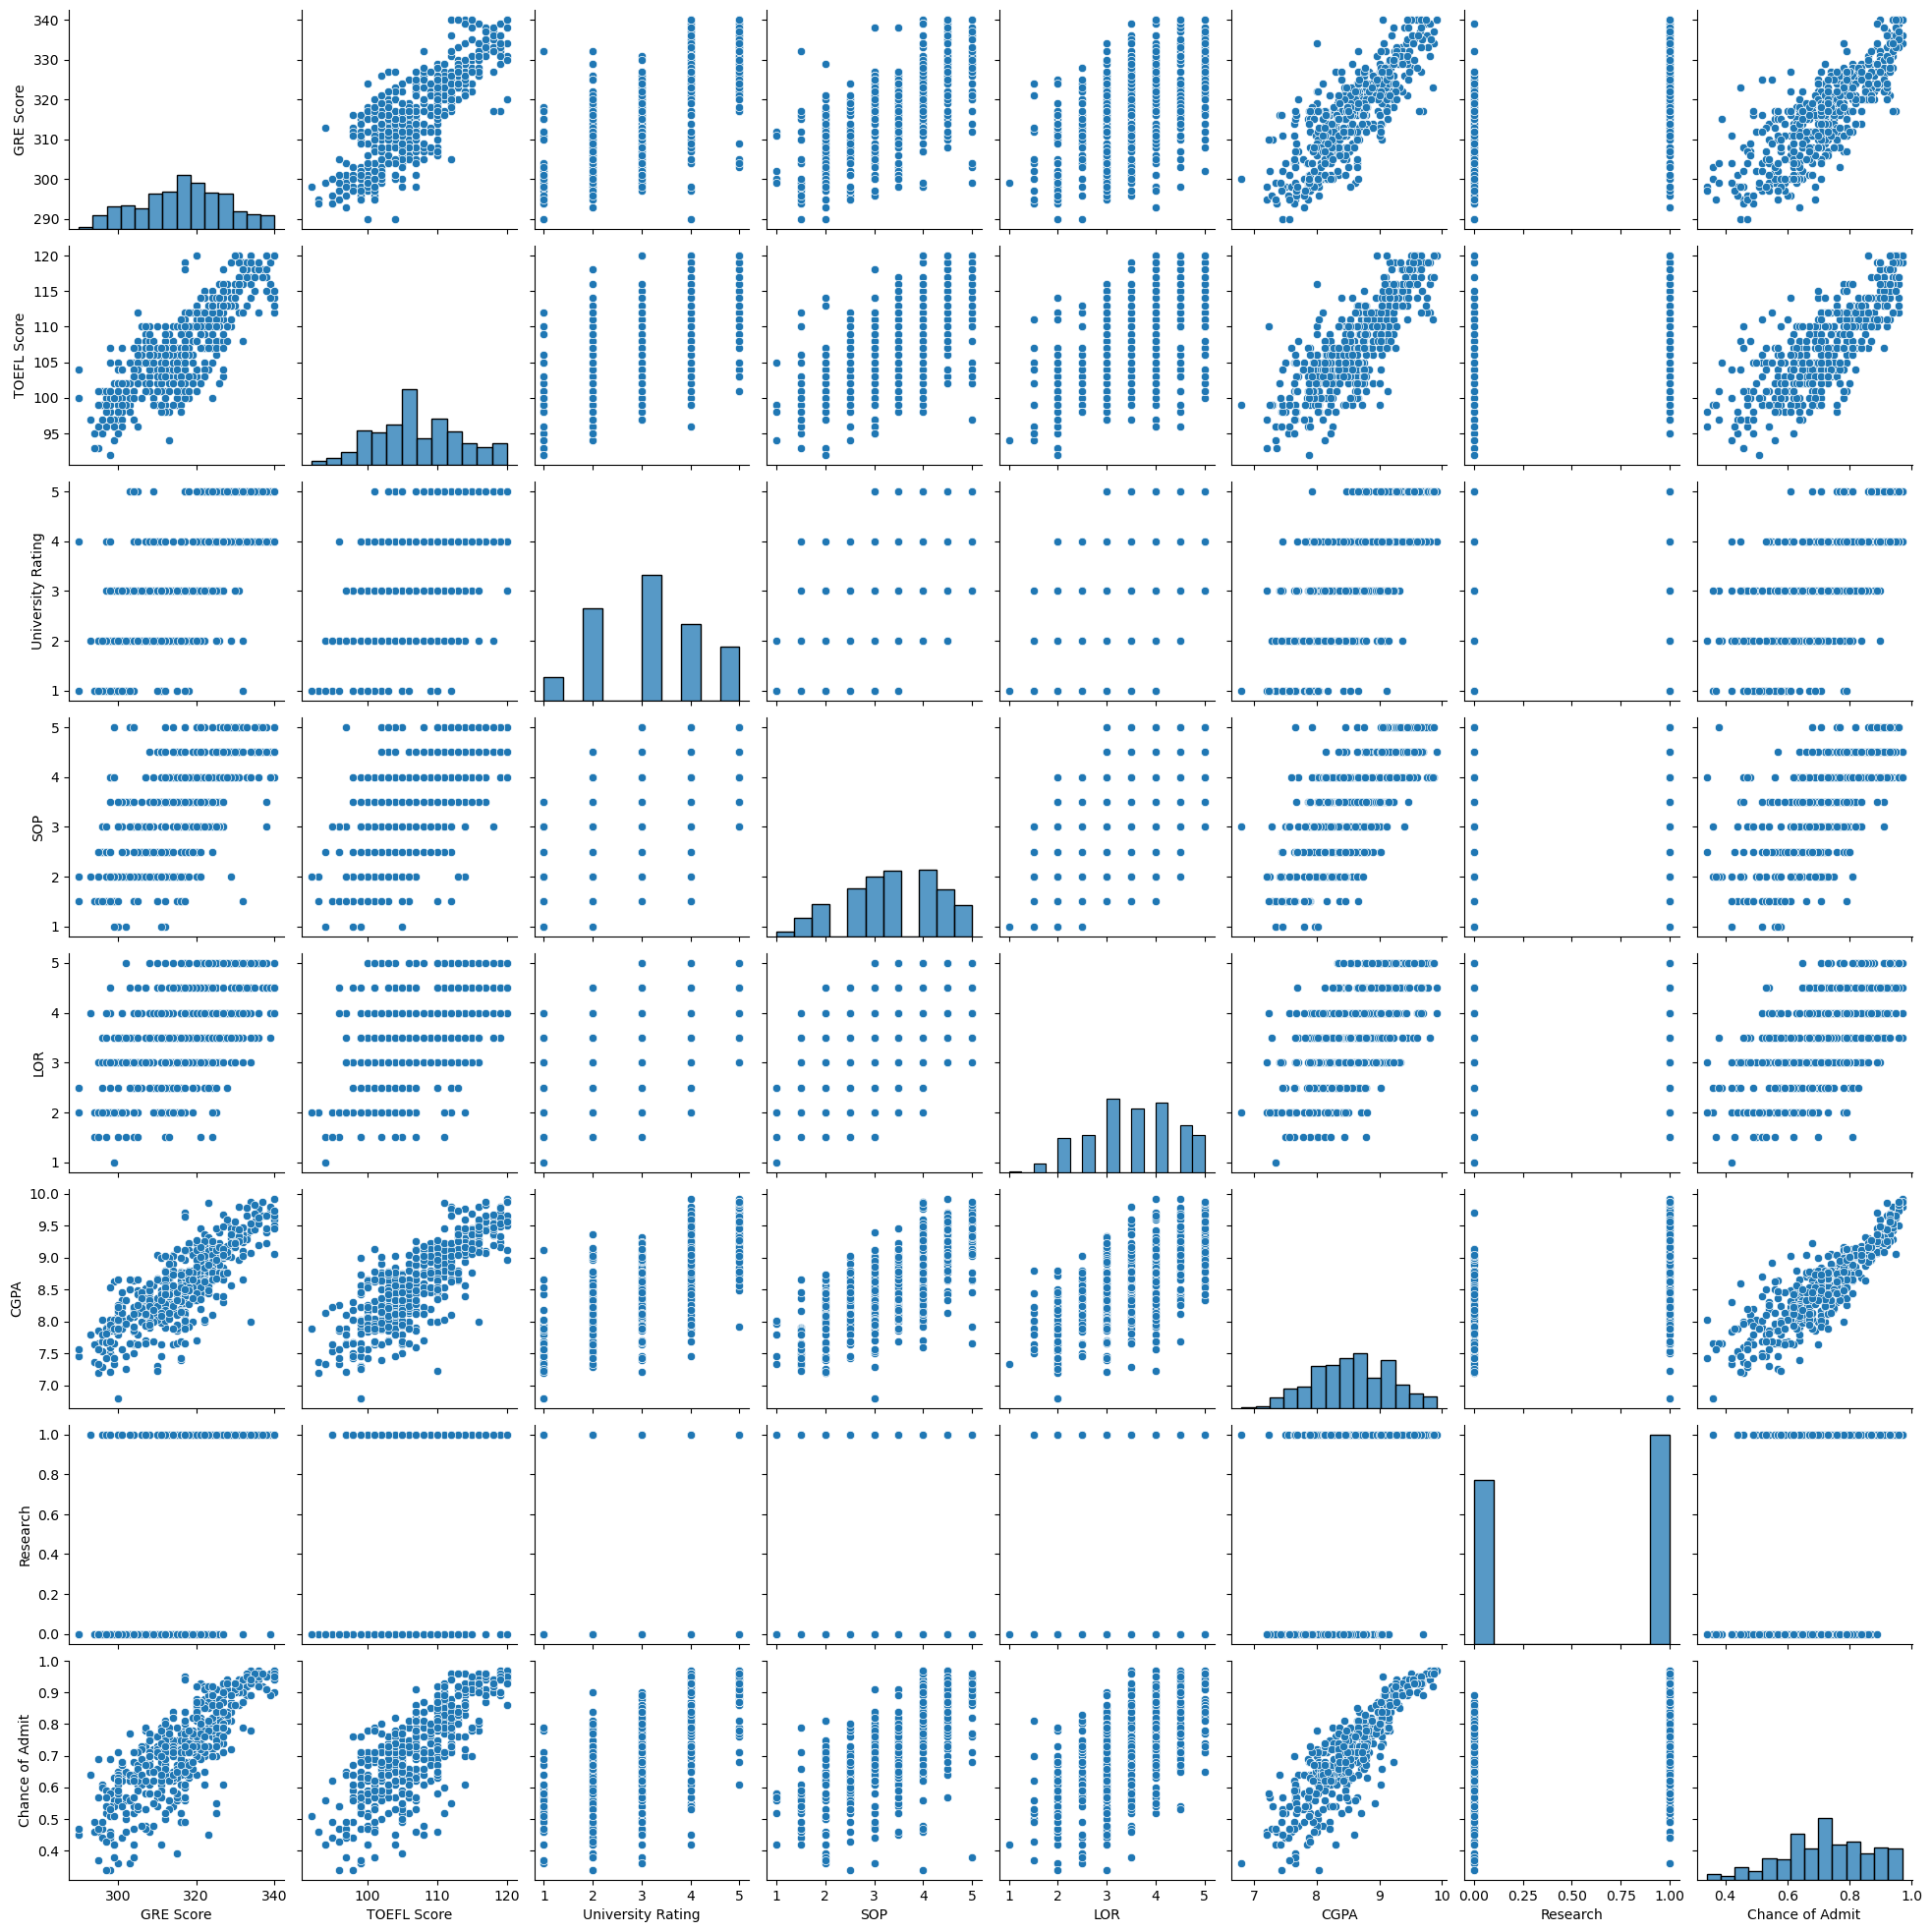

In [ ]:

df = pd.read_csv(r"https://raw.githubusercontent.com/s4sauravv/Datasets/refs/heads/main/Admission_Prediction.csv")
df = df.drop_duplicates()
df.fillna(df.median(), inplace=True)

if "Serial No." in df.columns:
    df.drop(columns=["Serial No."], inplace=True)

sns.pairplot(df)
plt.show()



In [22]:
# above pair plot shows relationships between each features

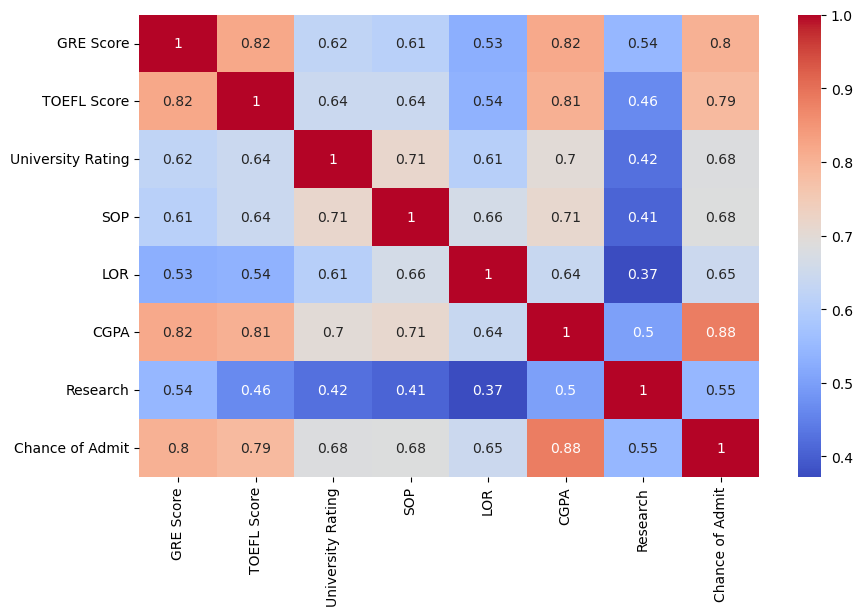

In [23]:
# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Heatmap shows correlation with each features where 1 shows highly correlated while 0 denotes less correlation

In [18]:
X = df.drop(columns=["Chance of Admit"])
y = df["Chance of Admit"]

In [19]:
# using standard scalar for standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
#  VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif_data)

             Feature       VIF
0          GRE Score  4.154712
1        TOEFL Score  3.795794
2  University Rating  2.517273
3                SOP  2.776399
4                LOR  2.037378
5               CGPA  4.653172
6           Research  1.458962


In [21]:
# Removing features with high VIF > 5
X = X.drop(columns=vif_data[vif_data["VIF"] > 5]["Feature"])
X_scaled = scaler.fit_transform(X)



In [24]:
# splittiong dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression 
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr))}")
print(f"R2 Score: {r2_score(y_test, y_pred_lr)}")



Linear Regression:
RMSE: 0.06048397782009578
R2 Score: 0.8211094585358515


In [12]:
# Ridge Regularization
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge Regression:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}")
print(f"R2 Score: {r2_score(y_test, y_pred_ridge)}")



Ridge Regression:
RMSE: 0.06049503982083802
R2 Score: 0.8210440174608911


In [13]:
# Lasso Regularization
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso Regression:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}")
print(f"R2 Score: {r2_score(y_test, y_pred_lasso)}")



Lasso Regression:
RMSE: 0.06137137039800142
R2 Score: 0.815821755279771
